In [238]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
features = ['Alcohol', 'MalicAcid ', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
            'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue', 
            'OD280/OD315OfDilutedWines', 'Proline']
target = ['Class']

In [99]:
# 1
data = pd.read_csv('wine.data', header=None, names=(target+features))

In [100]:
# 2
X = np.array(data[features])
Y = np.array(data[target])

In [199]:
# 3
l = len(data)
kf = KFold(l, n_folds=5, shuffle=True, random_state=42)

X_trn_folds = []
Y_trn_folds = []
X_tst_folds = []
Y_tst_folds = []

for train_index, test_index in kf:
    # X_train, X_test = X[train_index], X[test_index]
    # Y_train, Y_test = Y[train_index], Y[test_index]
    X_trn_folds.append(X[train_index])
    Y_trn_folds.append(Y[train_index])
    X_tst_folds.append(X[test_index])
    Y_tst_folds.append(Y[test_index])
    
print "Train size: ", len(Y_trn_folds[0])
print "Test size: ", len(Y_tst_folds[0])

Train size:  142
Test size:  36


In [231]:
# 4
accuracy = []
l = len(data)
kf = KFold(l, n_folds=5, shuffle=True, random_state=42)

for k in range(1, 51):
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X, Y.ravel(), cv=kf)
    accuracy.append(np.mean(scores))
    # accuracy.append()
    
    # scores = []
    # 
    # for i in range(5):
    #     clf = KNeighborsClassifier(n_neighbors=k)
    #     clf.fit(X_trn_folds[i], Y_trn_folds[i].ravel())
    #     # predicting
    #     Y_pred = clf.predict(X_tst_folds[i])
    #     scores.append(accuracy_score(Y_tst_folds[i], Y_pred))
    # 
    # accuracy.append(np.mean(scores))
    
print len(accuracy)

50


In [230]:
# 5
X_norm = scale(X)
# Y_norm = scale(Y).ravel()
# X_train_norm = [scale(X_train) for X_train in X_trn_folds]
# X_test_norm = [scale(X_test) for X_test in X_tst_folds]

/Users/igorshkov/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [235]:
# 6
accuracy_normal = []

l = len(data)
kf = KFold(l, n_folds=5, shuffle=True, random_state=42)

for k in range(1, 51):
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X_norm, Y.ravel(), cv=kf)
    accuracy_normal.append(np.mean(scores))
    
    # scores = []
    # 
    # for i in range(5):
    #     clf = KNeighborsClassifier(n_neighbors=k)
    #     clf.fit(X_train_norm[i], Y_trn_folds[i].ravel())
    #     # predicting
    #     Y_pred = clf.predict(X_test_norm[i])
    #     scores.append(accuracy_score(Y_tst_folds[i], Y_pred))
    # 
    # accuracy_normal.append(np.mean(scores))
    
print len(accuracy_normal)

50


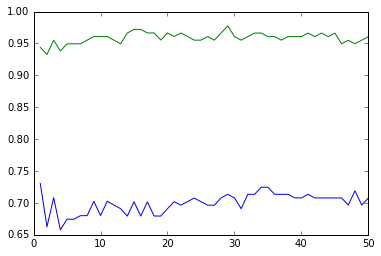

In [236]:
plt.plot(range(1, 51), accuracy)
plt.plot(range(1, 51), accuracy_normal)

In [182]:
# Question 1
# Best k with no normalization
accuracy_dic = dict(zip(range(1,51), accuracy))
max_k_no_norm = max(accuracy_dic, key=accuracy_dic.get)
max_k_no_norm

1

In [183]:
# Question 2
# Best score with no normalization
accuracy_dic[max_k_no_norm]

0.7304761904761905

In [237]:
# Question 3
# Best k with normalization
accuracy_dic = dict(zip(range(1,51), accuracy_normal))
max_k_norm = max(accuracy_dic, key=accuracy_dic.get)
max_k_norm

29

In [186]:
# Question 4
# Best score with normalization
accuracy_dic[max_k_norm]

0.96650793650793643